In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model, to_categorical

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import urllib
import csv





IMG_HEIGHT=48
IMG_WIDTH=48


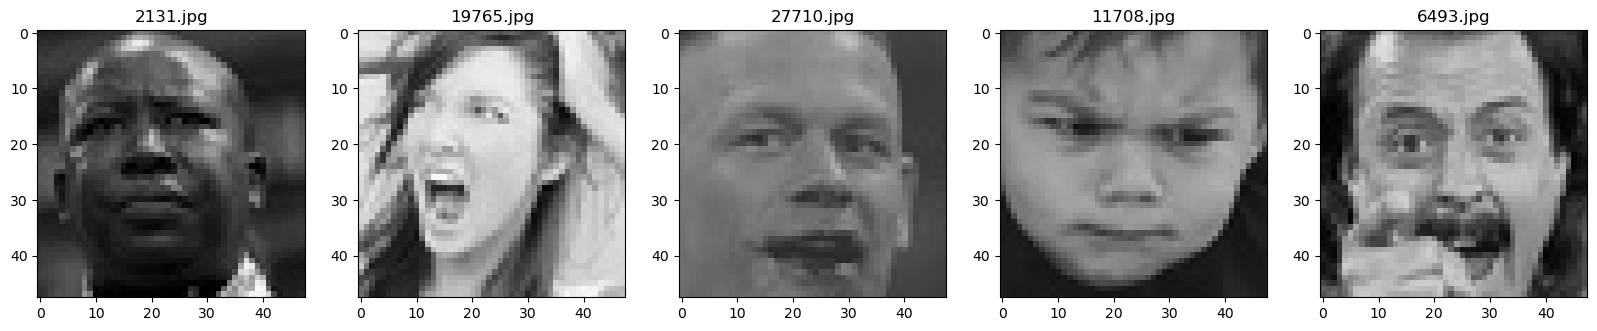

In [67]:
import random


plt.figure(figsize=(20,20))

hap_folder=r'E:\Face Base\Angry'
for i in range(5):
    file = random.choice(os.listdir(hap_folder))
    image_path= os.path.join(hap_folder, file)
    img=mpimg.imread(image_path)
    
    ax=plt.subplot(1,5,i+1)
    ax.set_title(file)
    plt.imshow(img)
    
    

In [68]:
def create_dataset(img_folder):
    image_array=[]
    name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1, file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image= image.astype('float32')
            image /= 255
            image_array.append(image)
            name.append(dir1)
            
    return (image_array, name)


(img_array, name) = create_dataset(r'E:\Face Base')


In [69]:
folder=r'E:\Face Base'


dictionary={k: v for v, k in enumerate(np.unique(name))}
dictionary 
{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprised': 5, 'Neutral': 6}

target_value= [dictionary[name[i]] for i in range (len(name))]



In [70]:
model= Sequential()
#First convolution layer:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#second
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#third
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#fourth
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#flattening
model.add(Flatten())

#coonnected first layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#connected second layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt=Adam(lr= 0.0005)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
#pooling layer for cnn


train_set=img_array

train_value=target_value


train_value = to_categorical(train_value, 7)


reduce_lr= ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience= 2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', 
    save_weights_only=True, mode='max', verbose=1)
#training the model
history = model.fit(
    x=np.array(train_set, np.float32), 
    y=np.array(train_value, np.float32), batch_size=64,  epochs=20, shuffle=True 
    #validation_data=(np.array(test_set, np.float32), (np.array(test_value, np.float32)))
)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_78 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_78 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_79 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_91 (Conv2D)          (None, 24, 24, 128)     

c:\Users\arwen\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 291s 619ms/step - loss: 1.8071 - accuracy: 0.2976
Epoch 2/20
469/469 [==============================] - 288s 614ms/step - loss: 1.4905 - accuracy: 0.4287
Epoch 3/20
469/469 [==============================] - 291s 621ms/step - loss: 1.3352 - accuracy: 0.4907
Epoch 4/20
469/469 [==============================] - 288s 614ms/step - loss: 1.2394 - accuracy: 0.5294
Epoch 5/20
469/469 [==============================] - 269s 573ms/step - loss: 1.1675 - accuracy: 0.5573
Epoch 6/20
469/469 [==============================] - 267s 570ms/step - loss: 1.1104 - accuracy: 0.5768
Epoch 7/20
469/469 [==============================] - 268s 570ms/step - loss: 1.0658 - accuracy: 0.5974
Epoch 8/20
469/469 [==============================] - 268s 571ms/step - loss: 1.0288 - accuracy: 0.6124
Epoch 9/20
469/469 [==============================] - 267s 570ms/step - loss: 0.9748 - accuracy: 0.6314
Epoch 10/20
469/469 [==============================] - 267s 569m

1/1 [==============================] - 0s 30ms/step
Sad


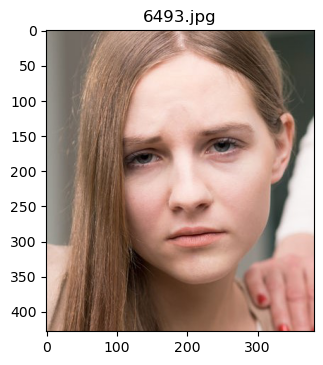

In [79]:
plt.figure(figsize=(20,20))

image_path=r'C:\Users\arwen\OneDrive\Desktop\sad.jpg'
image=mpimg.imread(image_path)
ax=plt.subplot(1,5,2)
ax.set_title(file)
plt.imshow(image)

image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
images_arr = []
images_arr.append(np.array(image))
img = np.asarray(images_arr)


img= img.astype('float32')
img /= 255

def find_emotion(prediction):
    emotion_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']
    highest_val=prediction.argmax()
    emotion=emotion_list[highest_val]
    return emotion


prediction=model.predict(img)
print(find_emotion(prediction))

#right now doesnt print values correctly



In [72]:
#saving the model as a json file
model_json = model.to_json()
model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)